In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

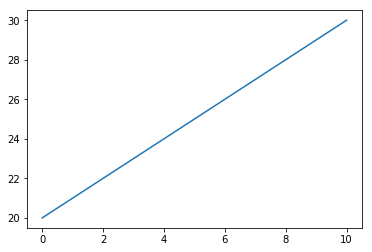

In [181]:
plt.plot([0,10],[20,30])

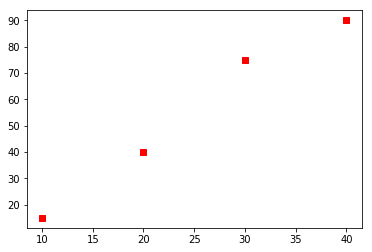

In [188]:
plt.plot([10,20,30,40], [15, 40, 75, 90], linestyle='', color='r', marker='s',
         linewidth=3.0)

In [183]:
plt.show()

In [5]:
y_axis = [20,50,30]
x_axis = range(len(y_axis))

In [6]:
plt.bar(x_axis, y_axis, width=0.4, color='yellow')

<Container object of 3 artists>

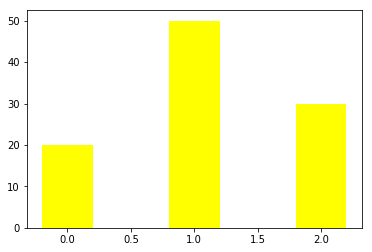

In [7]:
plt.show()

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [118]:
data = pd.read_excel("titanic3.xls")

In [46]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'passengerid'],
      dtype='object')

In [47]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,passengerid
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",5


In [48]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body,passengerid
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,655.000000
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922,378.020061
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000,328.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000,655.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000,982.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1309.000000


In [16]:
data['survived'].mean()

0.3819709702062643

In [25]:
data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

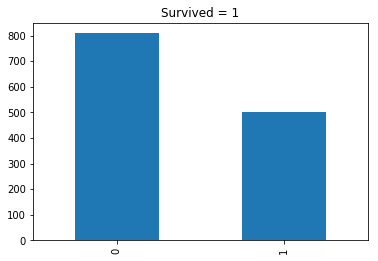

In [192]:
data['survived'].value_counts().plot(kind='bar')
plt.title("Survived = 1")

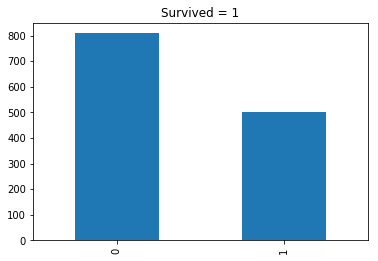

In [24]:
plt.show()

In [35]:
data['survived'][data['sex']=='male'].value_counts()

0    682
1    161
Name: survived, dtype: int64

In [32]:
data['survived'][data['sex']=='male'].value_counts().plot(kind='bar')
plt.title("The number of male survived")

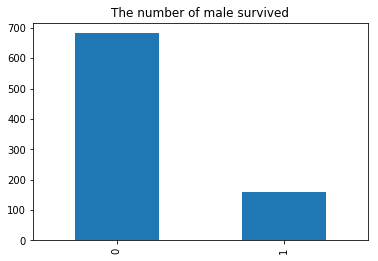

In [34]:
plt.show()

In [36]:
data['survived'][data['sex']=='female'].value_counts()

1    339
0    127
Name: survived, dtype: int64

In [40]:
data['survived'][data['sex']=='female'].value_counts().plot(kind='bar')

In [41]:
plt.title("The number of female survived")

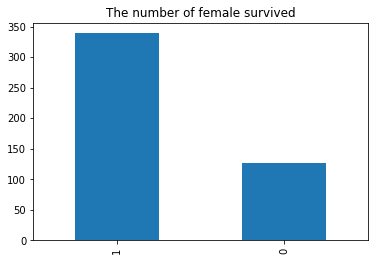

In [42]:
plt.show()

In [49]:
table = pd.pivot_table(data=data, values='passengerid', index='sex', columns='survived', aggfunc='count')

In [50]:
table

survived,0,1
sex,,
female,127,339
male,682,161


In [51]:
table[0]

sex
female    127
male      682
Name: 0, dtype: int64

In [52]:
bar_1 = table[0]
bar_2 = table[1]

In [194]:
x_pos

array([0, 1])

In [53]:
x_pos = np.arange(len(bar_1))


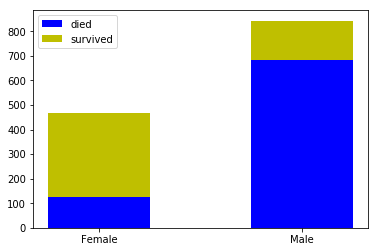

In [196]:
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b',label="died")
second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', bottom=bar_1,label="survived")
plt.xticks(x_pos, ('Female','Male'))
plt.legend()
plt.show()

In [55]:
data.survived.unique()

array([1, 0], dtype=int64)

In [56]:
data.pclass.unique()

array([1, 2, 3], dtype=int64)

In [57]:
label = data['survived']

In [58]:
label=label.values

In [59]:
label

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
data1 = data.filter(['pclass','sex','age'],axis=1)

In [82]:
data1.isnull().any()

pclass    False
sex       False
age        True
dtype: bool

In [83]:
data1['age'].fillna((data['age'].mean()),inplace=True)

In [84]:
data1=data1.values

In [85]:
data1

array([[1, 'female', 29.0],
       [1, 'male', 0.9167],
       [1, 'female', 2.0],
       ..., 
       [3, 'male', 26.5],
       [3, 'male', 27.0],
       [3, 'male', 29.0]], dtype=object)

In [86]:
def preprocess(data):
    for i in range(len(data)):
        data[i][1]=1. if data[i][1] =='female' else 0.
    return np.array(data,dtype=np.float32)

In [87]:
data1 = preprocess(data1)

In [88]:
data1

array([[  1.        ,   1.        ,  29.        ],
       [  1.        ,   0.        ,   0.91670001],
       [  1.        ,   1.        ,   2.        ],
       ..., 
       [  3.        ,   0.        ,  26.5       ],
       [  3.        ,   0.        ,  27.        ],
       [  3.        ,   0.        ,  29.        ]], dtype=float32)

In [89]:
train_label = label[:1000]

In [90]:
train_label

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0,

In [91]:
test_label = label[1000:]

In [92]:
test_label

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

In [93]:
train_data=data1[:1000]

In [94]:
test_data = data1[1000:]

In [95]:
from sklearn import svm

In [96]:
clf = svm.SVC(gamma=0.001, C=100.)

In [97]:
clf.fit(train_data,train_label)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
predicted=clf.predict(test_data)

In [119]:
clf.predict([1,0,2])[0]

c:\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


1

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(test_label,predicted)

0.74110032362459544

In [120]:
from sklearn.externals import joblib

In [121]:
joblib.dump(clf, 'svm.pkl')

['svm.pkl']

In [122]:
clf = joblib.load('svm.pkl') 

In [123]:
j = 0
for i in range(len(predicted)):
    if predicted[i]==test_label[i]:
        j = j+1
        

In [124]:
(j/len(predicted))*100

76.69902912621359

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = LogisticRegression()

In [127]:
model.fit(train_data,train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
predicted=model.predict(test_data)

In [129]:
accuracy_score(test_label,predicted)

0.76699029126213591

In [130]:
joblib.dump(model, 'LogisticRegression.pkl')

['LogisticRegression.pkl']

In [131]:
from sklearn import tree

In [132]:
model = tree.DecisionTreeClassifier(criterion='gini')

In [133]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [134]:
predicted = model.predict(test_data)

In [135]:
accuracy_score(test_label,predicted)

0.75404530744336573

In [136]:
joblib.dump(model,'decisiontree.pkl')

['decisiontree.pkl']

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
model = GaussianNB()

In [139]:
model.fit(train_data,train_label)

GaussianNB(priors=None)

In [140]:
predicted=model.predict(test_data)

In [141]:
accuracy_score(test_label,predicted)

0.76051779935275077

In [142]:
joblib.dump(model,'naivebayes.pkl')

['naivebayes.pkl']

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
model = KNeighborsClassifier(n_neighbors=5)

In [145]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
predicted=model.predict(test_data)

In [147]:
accuracy_score(test_label,predicted)

0.73786407766990292

In [148]:
joblib.dump(model,'KNeighnor.pkl')

['KNeighnor.pkl']

In [149]:
from sklearn.cluster import KMeans

In [150]:
k_means = KMeans(n_clusters=2,random_state=0)

In [151]:
k_means.fit(train_data,train_label)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [152]:
predicted=k_means.predict(test_data)

In [153]:
accuracy_score(test_label,predicted)

0.69255663430420711

In [154]:
joblib.dump(k_means,'k_mean.pkl')

['k_mean.pkl']

In [155]:
clf1 = joblib.load("decisiontree.pkl")

In [156]:
clf2 = joblib.load("k_mean.pkl")

In [157]:
clf3 = joblib.load("KNeighnor.pkl")

In [158]:
clf4 = joblib.load("LogisticRegression.pkl")

In [159]:
clf5 = joblib.load("naivebayes.pkl")

In [160]:
clf6 = joblib.load("svm.pkl")

In [164]:
value = [3,0,50]

In [165]:
value=np.array(value)

In [166]:
value=value.reshape(1,-1)

In [167]:
clf.predict(value)

array([0], dtype=int64)

In [169]:
def prediction():
    data={}
    votes=[]
    sex = input("Enter the sex:- ").lower()
    if sex=='male':
        sex=0
    else:
        sex=1
    age = input("Enter  age:- ")
    class1 = input("Enter class:- ")
    data['sex']=sex
    data['age']=float(age)
    data['class']=float(class1)
    list1=[data['class'],data['sex'],data['age']]
    list1 = np.array(list1)
    list1 = list1.reshape(1,-1)
    votes.append(clf1.predict(list1)[0])
    votes.append(clf1.predict(list1)[0])
    votes.append(clf1.predict(list1)[0])
    votes.append(clf1.predict(list1)[0])
    votes.append(clf1.predict(list1)[0])
    votes.append(clf1.predict(list1)[0])
    return votes
    
    

In [173]:
while True:
    print(prediction())
    y = input("Enter Y to exit:- ").lower()
    if y=='y':
        break



Enter the sex:- male
Enter  age:- 2
Enter class:- 1
[1, 1, 1, 1, 1, 1]
Enter Y to exit:- y
